<a href="https://colab.research.google.com/github/ummulqura/Machine-Learning/blob/main/PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PROJECT MACHINE LEARNING**
Membuat perbandingan kinerja dari dua metode supervised learning model

Dataset 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Cek dataset jika terdapat missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Isi data yg null pda kolom bmi dengan nilai rata-rata
df['bmi'].fillna(df['bmi'].mean(), inplace= True)

In [6]:
# Cek dataset setelah mengisi data null/missing values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# tampilkan data setelah mengisi missing values
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [8]:
# Cek statistic summary dari kolom numerik
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Drop data pada baris yang diberi label 'other' pada gender**

In [9]:
# tampilkan data dengan gender other
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [10]:
# drop data dengan gender other
df = df.drop(df[df['gender']=='Other'].index)

In [11]:
#tampilkan data setelah drop data dengan gender other
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# **Data Visualization**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

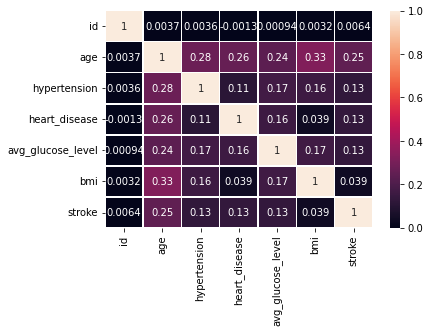

In [13]:
# lihat korelasi setiap feature
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

berdasarkan tabel korelasi diatas maka dapat dilihat jika stroke sangat berkorelasi dengan age, hypertension, heart_disease, dan avg_glucose_level.

  1. Stroke atau tidak stoke (pie chart)

In [14]:
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4860
1,249


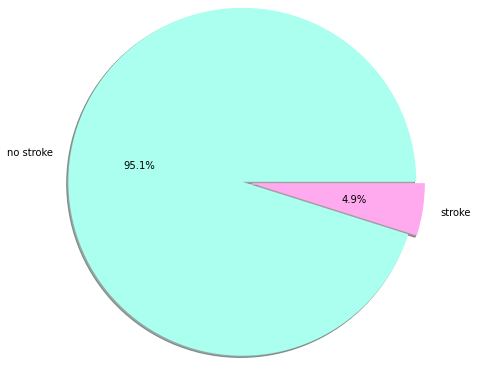

In [15]:
colors = ['#aaffee', '#ffaaee']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

2. Avg_glucose_level (histogram)

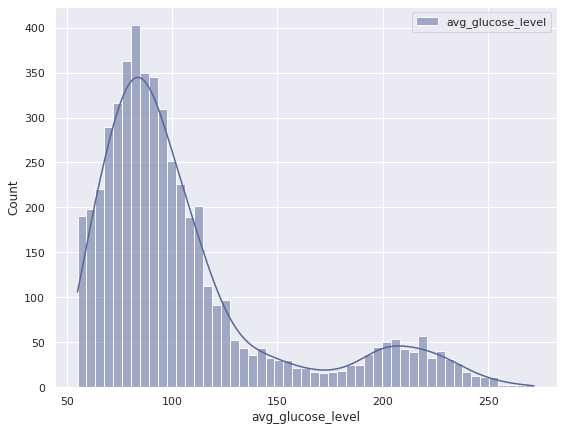

In [16]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.histplot(df['avg_glucose_level'], color="#556699", label="avg_glucose_level", kde= True)
plt.legend()

3. BMI

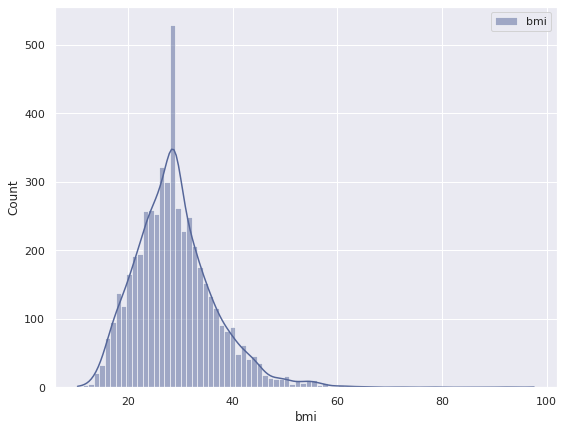

In [17]:
fig = plt.figure(figsize=(9,7))
sns.histplot(df['bmi'], color="#556699", label="bmi", kde= True)
plt.legend()

4. Stroke vs no stroke berdasarkan BMI

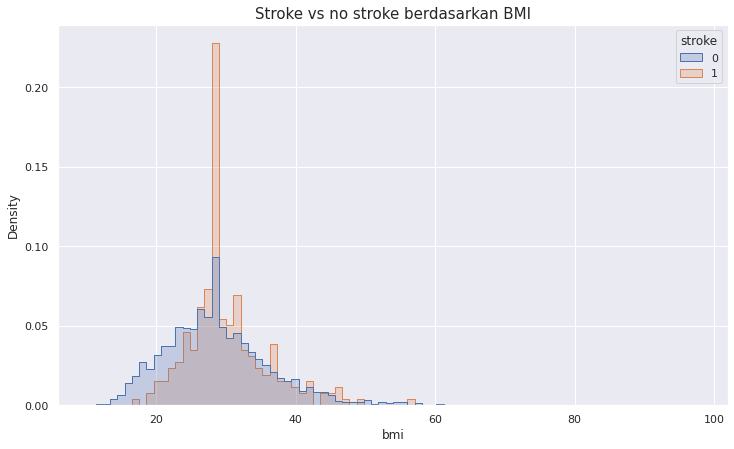

In [18]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke berdasarkan BMI', fontsize=15)
plt.show()

jika dilihat pada bagan diatas maka density dari orang yang kelebihan berat badan (bmi>25) menderita stroke lebih banyak

5. Stroke vs No stroke berdasarkan Avg_glucose_level

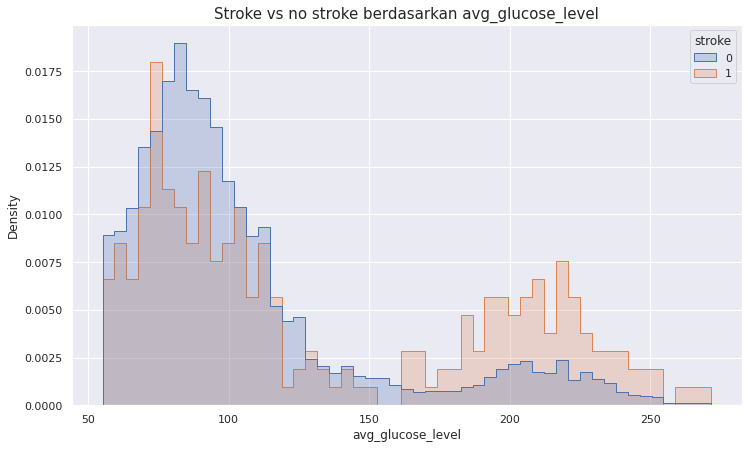

In [19]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke berdasarkan avg_glucose_level', fontsize=15)
plt.show()

density dari orang yang memiliki rata-rata kadar glukosa kurang dari 100 lebih banyak menderita stroke.

6. Stroke vs stroke berdasarkan Age

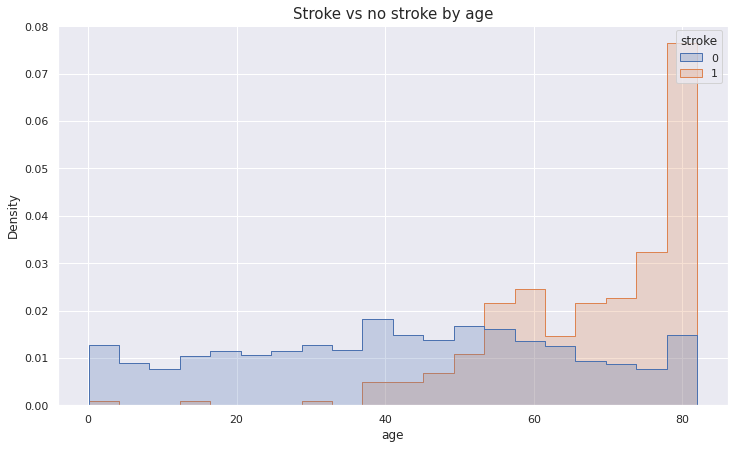

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

Density dari orang yang berusia lebih dari 50 tahun lebih banyak menderita stroke

7. Avg_glucose_level vs Age diklasifikasikan berdasarkan gender


> rata-rata gula darah normal adalah 150



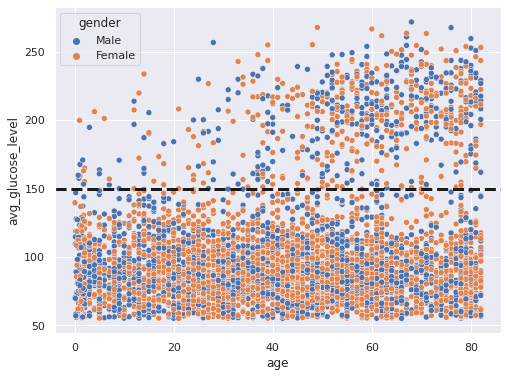

In [21]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.show()

Orang-orang yang memiliki rata-rata kadar glukosa di atas 150 relatif lebih sedikit dibandingkan dengan yang di bawah 150. Jadi, kita dapat mengatakan bahwa orang yang memiliki rata-rata kadar glukosa di atas 150 mungkin menderita diabetes.

In [22]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Data Preprocessing**

In [23]:
# drop feature/kolom yang tidak penting
df.drop('id', axis=1, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

In [25]:
# Handling text dan atribut kategorik dengan cara encoding
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(df.loc[:,i].value_counts())
    df[i] = lb.fit_transform(df[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [26]:
df = pd.get_dummies(df)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


# **Splitting dan Scaling Data**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_data = df.drop("stroke" , axis = 1).values
y_data = df["stroke"]

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.2 , random_state=42)

In [31]:
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)

# **Imbalanced Data**

> Seperti yang dilihat bahwa dataset yang kita miliki ini tidak seimbang dan ini merupakan masalah yang perlu kita tangani sebelum memulai pemodelan



In [32]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

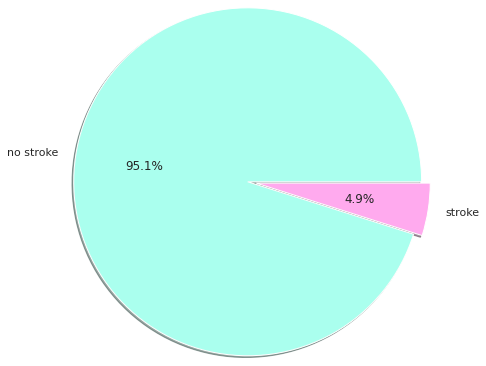

In [33]:
colors = ['#aaffee', '#ffaaee']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

# **Data Resampling**

> Oversampling dengan menggunakan metode SMOTE



In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# Apply oversampling
oversample = SMOTE()
x_data_balanced, y_data_balanced = oversample.fit_resample(x_train, y_train.ravel())

# **MODELING**

## **1. Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve, auc

In [37]:
# Klasifikasi dengan menggunakan random foerst
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred_train_rf = rf.predict(x_data_balanced)
acc_train_rf = accuracy_score(y_data_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print('Accuracy Random Forest Train :', acc_train_rf)
print('Accuracy Random Forest Test :',acc_test_rf)

Accuracy Random Forest Train : 1.0
Accuracy Random Forest Test : 0.9383561643835616


In [39]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

Precision: 0.333
Recall: 0.016
F-measure: 0.031


In [40]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.5552083333333334


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f06bdce54d0>)

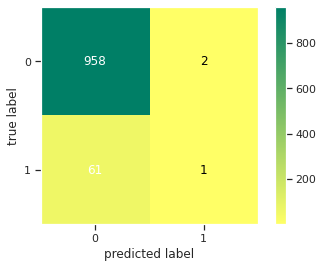

In [41]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test_rf), cmap = "summer_r", colorbar= True)

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

